In [11]:
import numpy as np
from emcee import PTSampler
import matplotlib.pyplot as plt
import corner 

In [10]:
# mu1 = [1, 1], mu2 = [-1, -1]
mu1 = np.ones(2)
mu2 = -np.ones(2)

# Width of 0.1 in each dimension
sigma1inv = np.diag([100.0, 100.0])
sigma2inv = np.diag([100.0, 100.0])

def logl(x):
    dx1 = x - mu1
    dx2 = x - mu2

    return np.logaddexp(-np.dot(dx1, np.dot(sigma1inv, dx1))/2.0,
                        -np.dot(dx2, np.dot(sigma2inv, dx2))/2.0)

# Use a flat prior
def logp(x):
    return 0.0

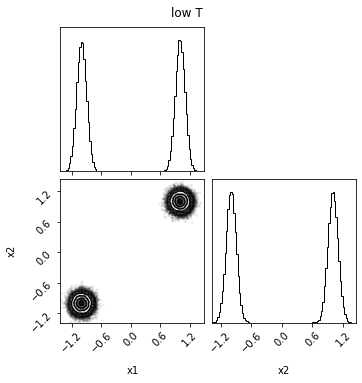

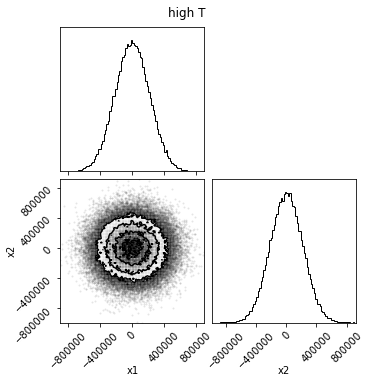

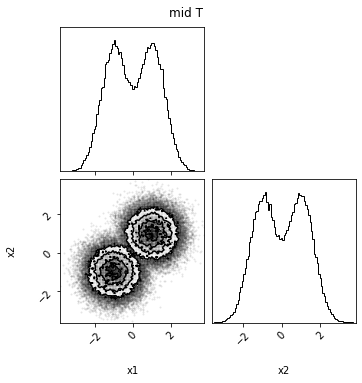

In [24]:
ntemps = 20
nwalkers = 100
ndim = 2

sampler=PTSampler(ntemps, nwalkers, ndim, logl, logp)
p0 = np.random.uniform(low=-1.0, high=1.0, size=(ntemps, nwalkers, ndim))
for p, lnprob, lnlike in sampler.sample(p0, iterations=1000):
    pass
sampler.reset()
for p, lnprob, lnlike in sampler.sample(p, lnprob0=lnprob,
                                           lnlike0=lnlike,
                                           iterations=10000, thin=10):
    pass

assert sampler.chain.shape == (ntemps, nwalkers, 1000, ndim)

# Chain has shape (ntemps, nwalkers, nsteps, ndim)
# Zero temperature mean:
mu0 = np.mean(np.mean(sampler.chain[0,...], axis=0), axis=0)

# Longest autocorrelation length (over any temperature)
#print(sampler.acor)
#max_acl = np.max(sampler.acor)
labels = ['x1', 'x2']
flat_samples = sampler.flatchain[0,:,:]
fig = corner.corner(
                flat_samples, bins=100, labels=labels)
plt.suptitle('low T')
plt.show()


flat_samples2 = sampler.flatchain[15,:,:]
fig = corner.corner(
                flat_samples2, bins=100, labels=labels)
plt.suptitle('high T')
plt.show()


flat_samples3 = sampler.flatchain[2,:,:]
fig = corner.corner(
                flat_samples3, bins=100, labels=labels)
plt.suptitle('mid T')
plt.show()
